<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Bayesian_Optimisation_Grok3_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def squared_exponential_kernel(x, x_prime, length_scale=0.3, sigma_f=1.0):
    """
    Squared exponential kernel: k(x, x') = sigma_f^2 * exp(-||x - x'||^2 / (2 * length_scale^2))
    """
    sq_dist = np.sum((x - x_prime) ** 2)
    return sigma_f ** 2 * np.exp(-sq_dist / (2 * length_scale ** 2))

def compute_k_x_X(x, X, length_scale=0.3, sigma_f=1.0):
    """
    Compute k(x, X): covariance vector between new point x and observed points X.
    """
    return np.array([squared_exponential_kernel(x, x_i, length_scale, sigma_f) for x_i in X])

def compute_K(X, length_scale=0.3, sigma_f=1.0, noise_variance=0.0):
    """
    Compute K: covariance matrix for observed points X.
    """
    n = len(X)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = squared_exponential_kernel(X[i], X[j], length_scale, sigma_f)
    if noise_variance > 0:
        K += noise_variance * np.eye(n)
    return K

def gp_predict(x, X, y, length_scale=0.3, sigma_f=1.0, noise_variance=0.0):
    """
    Compute GP predictive mean and standard deviation at point x.
    Inputs:
        x: New point (scalar or 1D array).
        X: Observed points (array of scalars or 1D arrays).
        y: Observed values (array).
        length_scale: Kernel length scale.
        sigma_f: Signal variance.
        noise_variance: Observation noise variance.
    Returns:
        mu: Predictive mean.
        sigma: Predictive standard deviation.
    """
    # Compute k(x, X)
    k_x_X = compute_k_x_X(x, X, length_scale, sigma_f)

    # Compute K
    K = compute_K(X, length_scale, sigma_f, noise_variance)

    # Compute K inverse
    K_inv = np.linalg.inv(K)

    # Predictive mean: mu(x) = k(x, X)^T * K^-1 * y
    mu = k_x_X.T @ K_inv @ y

    # Predictive variance: sigma^2(x) = k(x, x) - k(x, X)^T * K^-1 * k(x, X)
    k_x_x = squared_exponential_kernel(x, x, length_scale, sigma_f)
    var = k_x_x - k_x_X.T @ K_inv @ k_x_X

    # Ensure variance is non-negative (numerical errors)
    var = max(var, 0)
    sigma = np.sqrt(var)

    return mu, sigma

# Example usage
if __name__ == "__main__":
    # Observed data
    X = np.array([0.1, 0.5, 0.9])
    y = np.array([8.0, 10.0, 7.0])
    x_new = 0.6
    length_scale = 0.3
    sigma_f = 1.0
    noise_variance = 0.01  # Small noise for numerical stability

    # Compute prediction
    mu, sigma = gp_predict(x_new, X, y, length_scale, sigma_f, noise_variance)
    print(f"Predictive mean at x={x_new}: {mu:.3f}")
    print(f"Predictive standard deviation at x={x_new}: {sigma:.3f}")

Predictive mean at x=0.6: 9.602
Predictive standard deviation at x=0.6: 0.209


Predictive mean at x=0.6: 10.274
Predictive standard deviation at x=0.6: 0.094


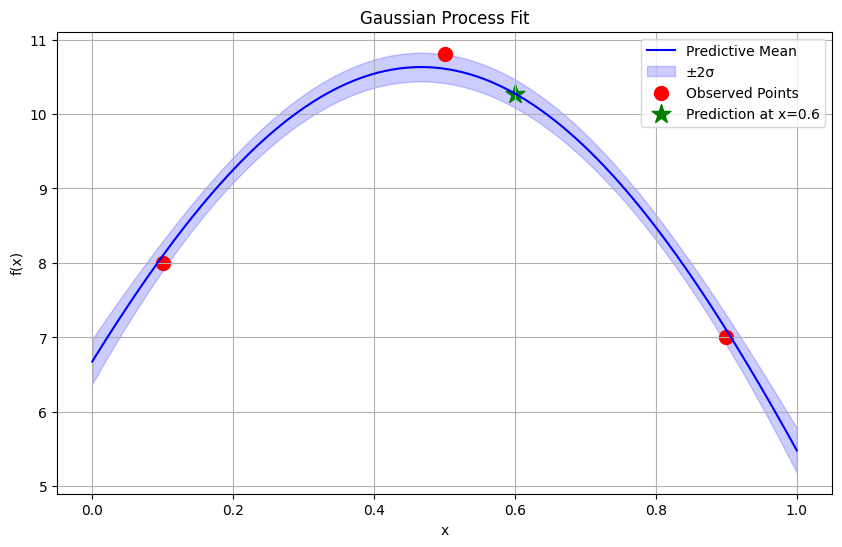

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def squared_exponential_kernel(x, x_prime, length_scale=1.0, sigma_f=3.2):
    """
    Squared exponential kernel: k(x, x') = sigma_f^2 * exp(-||x - x'||^2 / (2 * length_scale^2))
    """
    sq_dist = np.sum((x - x_prime) ** 2)
    return sigma_f ** 2 * np.exp(-sq_dist / (2 * length_scale ** 2))

def compute_k_x_X(x, X, length_scale=1.0, sigma_f=3.2):
    """
    Compute k(x, X): covariance vector between new point x and observed points X.
    """
    return np.array([squared_exponential_kernel(x, x_i, length_scale, sigma_f) for x_i in X])

def compute_K(X, length_scale=1.0, sigma_f=3.2, noise_variance=0.0):
    """
    Compute K: covariance matrix for observed points X.
    """
    n = len(X)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = squared_exponential_kernel(X[i], X[j], length_scale, sigma_f)
    if noise_variance > 0:
        K += noise_variance * np.eye(n)
    return K

def gp_predict(x, X, y, length_scale=1.0, sigma_f=3.2, noise_variance=0.0):
    """
    Compute GP predictive mean and standard deviation at point x.
    """
    k_x_X = compute_k_x_X(x, X, length_scale, sigma_f)
    K = compute_K(X, length_scale, sigma_f, noise_variance)
    K_inv = np.linalg.inv(K)
    mu = k_x_X.T @ K_inv @ y
    k_x_x = squared_exponential_kernel(x, x, length_scale, sigma_f)
    var = k_x_x - k_x_X.T @ K_inv @ k_x_X
    var = max(var, 0)
    sigma = np.sqrt(var)
    return mu, sigma

# Data and parameters
X = np.array([0.1, 0.5, 0.9])
y = np.array([8.0, 10.8, 7.0])  # Tuned y_2 to 10.8
x_new = 0.6
length_scale = 1.0
sigma_f = 3.2
noise_variance = 0.01

# Compute prediction at x = 0.6
mu, sigma = gp_predict(x_new, X, y, length_scale, sigma_f, noise_variance)
print(f"Predictive mean at x={x_new}: {mu:.3f}")
print(f"Predictive standard deviation at x={x_new}: {sigma:.3f}")

# Generate data for visualization
x_range = np.linspace(0, 1, 100)
mus = np.zeros(len(x_range))
sigmas = np.zeros(len(x_range))
for i, x in enumerate(x_range):
    mus[i], sigmas[i] = gp_predict(x, X, y, length_scale, sigma_f, noise_variance)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_range, mus, 'b-', label='Predictive Mean')
plt.fill_between(x_range, mus - 2 * sigmas, mus + 2 * sigmas, color='blue', alpha=0.2, label='±2σ')
plt.scatter(X, y, c='red', marker='o', s=100, label='Observed Points')
plt.scatter([x_new], [mu], c='green', marker='*', s=200, label=f'Prediction at x={x_new}')
plt.title('Gaussian Process Fit')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.savefig('gp_fit.png')
plt.show()

In [6]:
import numpy as np
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

# Define the search space
space = [
    Real(400000, 600000, name='P'),  # Price in $
    Real(0, 12, name='T')           # Launch time in months
]

# Fixed parameters
N = 0.905  # Units competitiveness score
A = 0.7    # Amenities score
M = 0.85   # MRT accessibility score
S = 0.75   # Schools score
E = 0.6    # Economic conditions score

# Weights
w1, w2, w3, w4, w5, w6, w7 = 0.25, 0.2, 0.15, 0.15, 0.1, 0.1, 0.05

# Constant term
C = w3 * N + w4 * A + w5 * M + w6 * S + w7 * E

# Objective function
@use_named_args(space)
def objective(P, T):
    # Price function
    f_P = (P / 600000) * np.exp(-0.00001 * P)
    # Time function (peaks at T=7 months)
    f_T = 0.8 * np.exp(-0.1 * (T - 7)**2)
    # Objective (negate for minimization)
    Z = w1 * f_P + w2 * f_T + C
    return -Z  # Minimize -Z to maximize Z

# Run Bayesian optimization
result = gp_minimize(
    objective,
    space,
    n_calls=15,           # Total evaluations
    n_random_starts=5,    # Initial random points
    acq_func="EI",        # Expected Improvement
    random_state=42,
    verbose=True
)

# Extract results
optimal_P, optimal_T = result.x
optimal_Z = -result.fun

# Print results
print(f"\nOptimal Launch Parameters:")
print(f"Price: ${optimal_P:.2f} per unit")
print(f"Launch Time: {optimal_T:.2f} months")
print(f"Objective Score (Z): {optimal_Z:.4f}")

# Optional: List all evaluated points
print("\nEvaluated Points:")
for i, (params, z) in enumerate(zip(result.x_iters, -result.func_vals)):
    print(f"Iteration {i+1}: Price=${params[0]:.2f}, Time={params[1]:.2f} months, Z={z:.4f}")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0039
Function value obtained: -0.4476
Current minimum: -0.4476
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: -0.5912
Current minimum: -0.5912
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0026
Function value obtained: -0.4378
Current minimum: -0.5912
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: -0.4975
Current minimum: -0.5912
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.8251
Function value obtained: -0.5830
Current minimum: -0.5912
Iteration No: 6 started. 